### Imports

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Setting Spotipy API

In [ ]:
SPOTIPY_CLIENT_ID = ''
SPOTIPY_CLIENT_SECRET= ""
auth_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

### Searching for songs

To get the songs from Spotify manually, We used spotipys search method.


Search method returns the best n possible songs to given input. a good part of this method is it returns songs with high popularity before songs with less popularity.

We defined most possible characters to be initial character of a song name. With A-Z, 0-9 We got 35 characters.
Search meethod allowed us to get maximum of 50 songs per search. So we got 50 x 35 = 1750 songs.

In get_songs method, we get this 1750 songs and desired audio features and feed it to dataframe.

In get_features method, we take the numerical values for each song using spotipys audio_features method as well as some identifical features such as name of the artist and song.

name(string): The name of the track.

album['name'] (an array of strings): The name of the album on which the track appears. 

artists['name'] (an array of strings): The names of the artists who performed the track.

album['release_date'] (string):	The date the album was first released, for example "1981-12-15".

duration_ms(int): The track length in milliseconds.

popularity(int): The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past.


acousticness(float): A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 

danceability(float): Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 

energy(float): Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

instrumentalness(float): Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness(float): Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

loudness(float): The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 

speechiness(float): Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

tempo(float): The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.


time_signature(int) : An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).


https://developer.spotify.com/documentation/



https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

In [2]:
all_letters = 'a b c d e f g h i j k l m n o p r s t u y z q x w 0 1 2 3 4 5 6 7 8 9'
starts = all_letters.split()
print(starts)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'y', 'z', 'q', 'x', 'w', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [3]:
def get_features(tr_id):
    meta = sp.track(tr_id)
    features = sp.audio_features(tr_id)
    
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']
    
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']
    
    track = [name, album, artist, release_date, length, popularity, danceability, acousticness, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    return track

In [4]:
def get_songs():
    tracks = []
    for i in starts:
        song=sp.search(i,limit=50)
        for j in range(50):
            tr_id = song['tracks']['items'][j]['id']
            track = get_features(tr_id)
            tracks.append(track)
    df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'])
    return df

In [5]:
df = get_songs()

NameError: name 'sp' is not defined

### Storing the data

We took the data from Spotipy once, then stored it as csv file to use in further parts of the project.

In [6]:
df.to_csv("/spotify_data.csv", sep=',')

NameError: name 'df' is not defined

In [2]:
df = pd.read_csv("spotify_data.csv")

### First Observations

In [3]:
df

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0,All I Want for Christmas Is You,Merry Christmas,Mariah Carey,1994-11-01,241106,92,0.336,0.16400,0.627,0.000000,0.0708,-7.463,0.0384,150.273,4
1,1,All Girls Are The Same,Goodbye & Good Riddance,Juice WRLD,2018-12-10,165819,87,0.671,0.07690,0.529,0.000335,0.0856,-7.226,0.3070,161.989,4
2,2,After Party,Heaven Or Hell,Don Toliver,2020-03-13,167915,85,0.629,0.00981,0.692,0.331000,0.6030,-8.045,0.0376,162.948,4
3,3,Are You Bored Yet? (feat. Clairo),Nothing Happens,Wallows,2019-03-22,178000,85,0.682,0.15600,0.683,0.000023,0.2730,-6.444,0.0287,120.023,4
4,4,ALWAYS DO,F*CK LOVE (SAVAGE),The Kid LAROI,2020-11-06,151704,84,0.762,0.04420,0.426,0.000000,0.0858,-6.865,0.1130,167.827,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,1745,We Don't Talk Anymore (feat. Selena Gomez),Nine Track Mind,Charlie Puth,2016-01-29,217706,68,0.728,0.62100,0.563,0.000000,0.1790,-8.053,0.1340,100.017,4
1746,1746,Nine in the Afternoon - Single Mix,Pretty. Odd.,Panic! At The Disco,2008-03-21,191560,63,0.405,0.08430,0.689,0.000000,0.2070,-5.750,0.0365,155.189,4
1747,1747,911 - WEISS Remix,911 (WEISS Remix),Lady Gaga,2020-12-04,343179,0,0.630,0.01000,0.932,0.756000,0.0312,-5.984,0.0409,121.009,4
1748,1748,911 - Sofi Tukker Remix,911 (Sofi Tukker Remix),Lady Gaga,2020-12-04,226548,0,0.849,0.10500,0.699,0.000000,0.0998,-6.603,0.0365,123.999,4


We saw there is an unneccesary "Unnamed: 0" column and dropped it.

In [4]:
df = df.drop('Unnamed: 0', axis=1)
df

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,All I Want for Christmas Is You,Merry Christmas,Mariah Carey,1994-11-01,241106,92,0.336,0.16400,0.627,0.000000,0.0708,-7.463,0.0384,150.273,4
1,All Girls Are The Same,Goodbye & Good Riddance,Juice WRLD,2018-12-10,165819,87,0.671,0.07690,0.529,0.000335,0.0856,-7.226,0.3070,161.989,4
2,After Party,Heaven Or Hell,Don Toliver,2020-03-13,167915,85,0.629,0.00981,0.692,0.331000,0.6030,-8.045,0.0376,162.948,4
3,Are You Bored Yet? (feat. Clairo),Nothing Happens,Wallows,2019-03-22,178000,85,0.682,0.15600,0.683,0.000023,0.2730,-6.444,0.0287,120.023,4
4,ALWAYS DO,F*CK LOVE (SAVAGE),The Kid LAROI,2020-11-06,151704,84,0.762,0.04420,0.426,0.000000,0.0858,-6.865,0.1130,167.827,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,We Don't Talk Anymore (feat. Selena Gomez),Nine Track Mind,Charlie Puth,2016-01-29,217706,68,0.728,0.62100,0.563,0.000000,0.1790,-8.053,0.1340,100.017,4
1746,Nine in the Afternoon - Single Mix,Pretty. Odd.,Panic! At The Disco,2008-03-21,191560,63,0.405,0.08430,0.689,0.000000,0.2070,-5.750,0.0365,155.189,4
1747,911 - WEISS Remix,911 (WEISS Remix),Lady Gaga,2020-12-04,343179,0,0.630,0.01000,0.932,0.756000,0.0312,-5.984,0.0409,121.009,4
1748,911 - Sofi Tukker Remix,911 (Sofi Tukker Remix),Lady Gaga,2020-12-04,226548,0,0.849,0.10500,0.699,0.000000,0.0998,-6.603,0.0365,123.999,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 15 columns):
name                1750 non-null object
album               1750 non-null object
artist              1750 non-null object
release_date        1750 non-null object
length              1750 non-null int64
popularity          1750 non-null int64
danceability        1750 non-null float64
acousticness        1750 non-null float64
energy              1750 non-null float64
instrumentalness    1750 non-null float64
liveness            1750 non-null float64
loudness            1750 non-null float64
speechiness         1750 non-null float64
tempo               1750 non-null float64
time_signature      1750 non-null int64
dtypes: float64(8), int64(3), object(4)
memory usage: 205.2+ KB


Checked if there are any missing values.
The data is full.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
length,1750.0,197369.099429,49858.590397,31294.000000,167977.75000,195428.00000,221819.500000,943528.000
popularity,1750.0,75.439429,17.937205,0.000000,72.00000,80.00000,85.000000,100.000
danceability,1750.0,0.658289,0.169763,0.000000,0.56125,0.68450,0.780750,0.980
acousticness,1750.0,0.268586,0.284082,0.000034,0.04610,0.15600,0.403750,0.996
energy,1750.0,0.596209,0.190230,0.000020,0.48800,0.61800,0.723000,0.999
instrumentalness,1750.0,0.040039,0.166493,0.000000,0.00000,0.00000,0.000047,1.000
liveness,1750.0,0.177112,0.137126,0.031200,0.09820,0.12200,0.203000,0.945
loudness,1750.0,-7.565994,4.371989,-47.190000,-8.41500,-6.65800,-5.247000,-0.092
speechiness,1750.0,0.128126,0.120041,0.000000,0.04160,0.07025,0.196000,0.915
tempo,1750.0,122.682494,31.660106,0.000000,95.00400,123.06500,145.010000,206.962


Length column is not human-friendly because it is in milliseconds. Converted that to minutes

### Converting length in ms to length in minutes

In [7]:
df['length'] = df['length'] / 60000
df

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,All I Want for Christmas Is You,Merry Christmas,Mariah Carey,1994-11-01,4.018433,92,0.336,0.16400,0.627,0.000000,0.0708,-7.463,0.0384,150.273,4
1,All Girls Are The Same,Goodbye & Good Riddance,Juice WRLD,2018-12-10,2.763650,87,0.671,0.07690,0.529,0.000335,0.0856,-7.226,0.3070,161.989,4
2,After Party,Heaven Or Hell,Don Toliver,2020-03-13,2.798583,85,0.629,0.00981,0.692,0.331000,0.6030,-8.045,0.0376,162.948,4
3,Are You Bored Yet? (feat. Clairo),Nothing Happens,Wallows,2019-03-22,2.966667,85,0.682,0.15600,0.683,0.000023,0.2730,-6.444,0.0287,120.023,4
4,ALWAYS DO,F*CK LOVE (SAVAGE),The Kid LAROI,2020-11-06,2.528400,84,0.762,0.04420,0.426,0.000000,0.0858,-6.865,0.1130,167.827,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,We Don't Talk Anymore (feat. Selena Gomez),Nine Track Mind,Charlie Puth,2016-01-29,3.628433,68,0.728,0.62100,0.563,0.000000,0.1790,-8.053,0.1340,100.017,4
1746,Nine in the Afternoon - Single Mix,Pretty. Odd.,Panic! At The Disco,2008-03-21,3.192667,63,0.405,0.08430,0.689,0.000000,0.2070,-5.750,0.0365,155.189,4
1747,911 - WEISS Remix,911 (WEISS Remix),Lady Gaga,2020-12-04,5.719650,0,0.630,0.01000,0.932,0.756000,0.0312,-5.984,0.0409,121.009,4
1748,911 - Sofi Tukker Remix,911 (Sofi Tukker Remix),Lady Gaga,2020-12-04,3.775800,0,0.849,0.10500,0.699,0.000000,0.0998,-6.603,0.0365,123.999,4


### Dropping songs with popularity below 60

In [8]:
df.sort_values("popularity", ascending=True)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
1749,911 - Bruno Martini Remix,911 (Bruno Martini Remix),Lady Gaga,2020-12-04,2.767133,0,0.774,0.0105,0.888,0.000225,0.123,-4.067,0.0559,124.021,4
1298,En Cero,Para Bailar y Sonreír,Various Artists,2020-12-04,3.726433,0,0.733,0.1560,0.783,0.000000,0.286,-4.788,0.0386,93.018,4
1297,En Cero,HOLA 2021,Various Artists,2020-12-04,3.726433,0,0.733,0.1560,0.783,0.000000,0.286,-4.788,0.0386,93.018,4
769,Peligrosa,Bienvenido 2021,Various Artists,2020-12-04,3.372433,0,0.769,0.0545,0.759,0.000628,0.100,-4.392,0.0510,105.993,4
1681,8 Figures (feat. Meek Mill),My Brother’s Keeper (Long Live G),DaBaby,2020-11-20,2.982467,0,0.605,0.0488,0.520,0.000000,0.167,-8.572,0.3910,87.568,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,Mood (feat. iann dior),Mood (feat. iann dior),24kGoldn,2020-07-24,2.342083,98,0.700,0.2210,0.722,0.000000,0.272,-3.558,0.0369,90.989,4
137,Dakiti,Dakiti,Bad Bunny,2020-10-30,3.418167,100,0.731,0.4010,0.573,0.000052,0.113,-10.059,0.0544,109.928,4
83,Dakiti,Dakiti,Bad Bunny,2020-10-30,3.418167,100,0.731,0.4010,0.573,0.000052,0.113,-10.059,0.0544,109.928,4
463,Dakiti,Dakiti,Bad Bunny,2020-10-30,3.418167,100,0.731,0.4010,0.573,0.000052,0.113,-10.059,0.0544,109.928,4


We saw there are many songs with low popularity, even with 0.
We did a mask to get rid of songs with low popularity because they are irrelevant to our mission.

In [9]:
df= df[df["popularity"] > 60]

### Dropping duplicate songs

Also, there are duplicate songs.

In [10]:
df.sort_values("name", ascending=False)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
1127,¿Quien Tu Eres?,X 100PRE,Bad Bunny,2018-12-23,2.653800,67,0.727,0.1850,0.5800,0.000004,0.125,-6.804,0.1360,137.048,4
1003,you were good to me,brent,Jeremy Zucker,2019-05-03,3.652433,82,0.561,0.9130,0.0848,0.000026,0.112,-15.099,0.0404,102.128,4
1081,you were good to me,brent,Jeremy Zucker,2019-05-03,3.652433,82,0.561,0.9130,0.0848,0.000026,0.112,-15.099,0.0404,102.128,4
1391,you were good to me,brent,Jeremy Zucker,2019-05-03,3.652433,82,0.561,0.9130,0.0848,0.000026,0.112,-15.099,0.0404,102.128,4
1014,you should see me in a crown,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",Billie Eilish,2019-03-29,3.015867,80,0.678,0.4620,0.5330,0.219000,0.139,-10.485,0.1860,150.455,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,"0 Sentimientos (Remix) [feat. Noriel, Darkiel,...","0 Sentimientos (Remix) [feat. Noriel, Darkiel,...",Jon Z,2016-11-24,5.595600,66,0.894,0.1550,0.7210,0.000000,0.154,-5.829,0.2580,107.963,4
9,"...And To Those I Love, Thanks For Sticking Ar...",STOP STARING AT THE SHADOWS,$uicideBoy$,2020-02-14,2.808150,81,0.792,0.1300,0.5120,0.000088,0.140,-6.875,0.0408,113.978,4
1393,"...And To Those I Love, Thanks For Sticking Ar...",STOP STARING AT THE SHADOWS,$uicideBoy$,2020-02-14,2.808150,81,0.792,0.1300,0.5120,0.000088,0.140,-6.875,0.0408,113.978,4
993,"...And To Those I Love, Thanks For Sticking Ar...",STOP STARING AT THE SHADOWS,$uicideBoy$,2020-02-14,2.808150,81,0.792,0.1300,0.5120,0.000088,0.140,-6.875,0.0408,113.978,4


In [11]:
df.drop_duplicates(keep='first', inplace=True)

In [12]:
df.sort_values("name", ascending=False)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
1127,¿Quien Tu Eres?,X 100PRE,Bad Bunny,2018-12-23,2.653800,67,0.727,0.1850,0.5800,0.000004,0.1250,-6.804,0.1360,137.048,4
1003,you were good to me,brent,Jeremy Zucker,2019-05-03,3.652433,82,0.561,0.9130,0.0848,0.000026,0.1120,-15.099,0.0404,102.128,4
1014,you should see me in a crown,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",Billie Eilish,2019-03-29,3.015867,80,0.678,0.4620,0.5330,0.219000,0.1390,-10.485,0.1860,150.455,4
84,you broke me first,you broke me first,Tate McRae,2020-04-17,2.821083,94,0.642,0.7860,0.3740,0.000000,0.0906,-9.386,0.0545,124.099,4
1151,xanny,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",Billie Eilish,2019-03-29,4.062083,77,0.521,0.7510,0.1250,0.002070,0.2650,-17.832,0.2390,111.554,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,000000,EXOTIGAZ,A.CHAL,2018-12-08,2.753567,63,0.734,0.4940,0.4720,0.002930,0.1020,-8.192,0.3060,190.011,4
1250,0 To 100 / The Catch Up,0 To 100 / The Catch Up,Drake,2013-07-14,4.587100,71,0.559,0.7370,0.7160,0.000000,0.2520,-3.964,0.3900,176.618,4
1256,"0 Sentimientos (Remix) [feat. Noriel, Darkiel,...","0 Sentimientos (Remix) [feat. Noriel, Darkiel,...",Jon Z,2016-11-24,5.595600,66,0.894,0.1550,0.7210,0.000000,0.1540,-5.829,0.2580,107.963,4
9,"...And To Those I Love, Thanks For Sticking Ar...",STOP STARING AT THE SHADOWS,$uicideBoy$,2020-02-14,2.808150,81,0.792,0.1300,0.5120,0.000088,0.1400,-6.875,0.0408,113.978,4


After dropping songs with low popularity and duplicates, There are 1022 songs remaining.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 0 to 1746
Data columns (total 15 columns):
name                1022 non-null object
album               1022 non-null object
artist              1022 non-null object
release_date        1022 non-null object
length              1022 non-null float64
popularity          1022 non-null int64
danceability        1022 non-null float64
acousticness        1022 non-null float64
energy              1022 non-null float64
instrumentalness    1022 non-null float64
liveness            1022 non-null float64
loudness            1022 non-null float64
speechiness         1022 non-null float64
tempo               1022 non-null float64
time_signature      1022 non-null int64
dtypes: float64(9), int64(2), object(4)
memory usage: 127.8+ KB


### Analysis

Looking at the shape of our data

<Figure size 1440x1008 with 0 Axes>

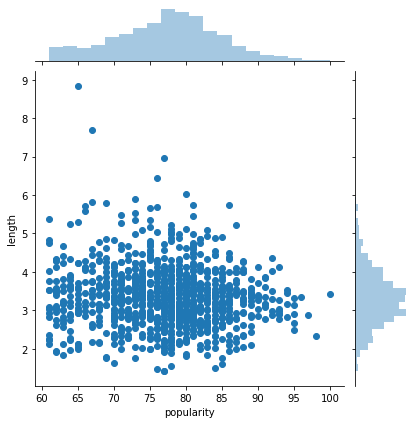

In [14]:
plt.figure(figsize=(20, 14))
ax = sns.jointplot(x=df.popularity,y=df["length"],data=df)

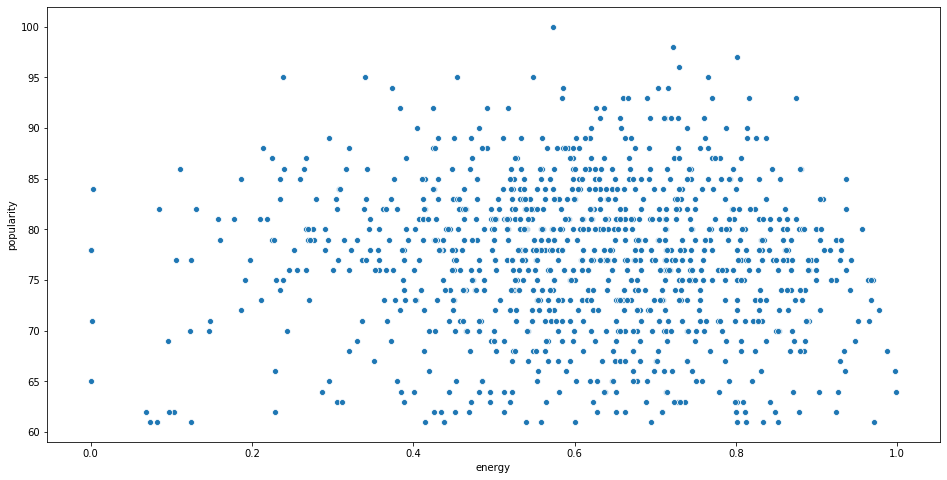

In [15]:
plt.figure(figsize=(16, 8))
ax = sns.scatterplot(x=df.energy, y=df.popularity,data=df)

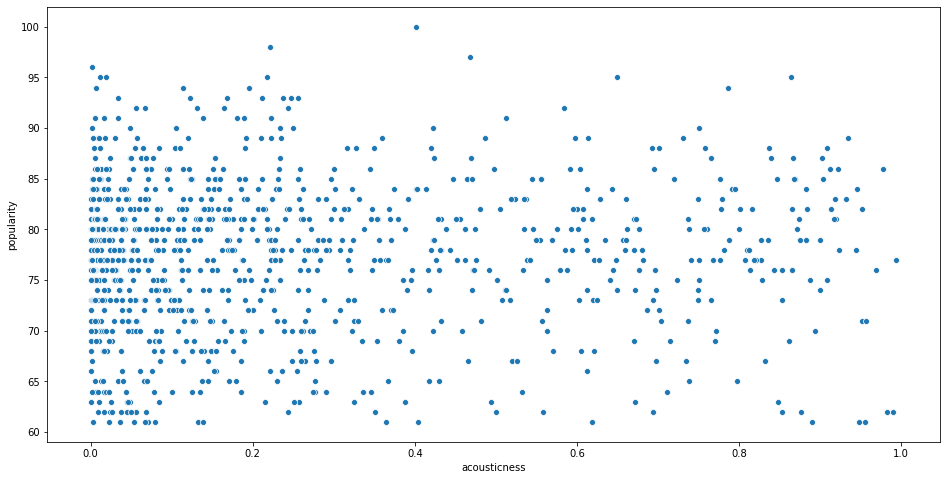

In [16]:
plt.figure(figsize=(16, 8))
ax = sns.scatterplot(x=df.acousticness, y=df.popularity,data=df)

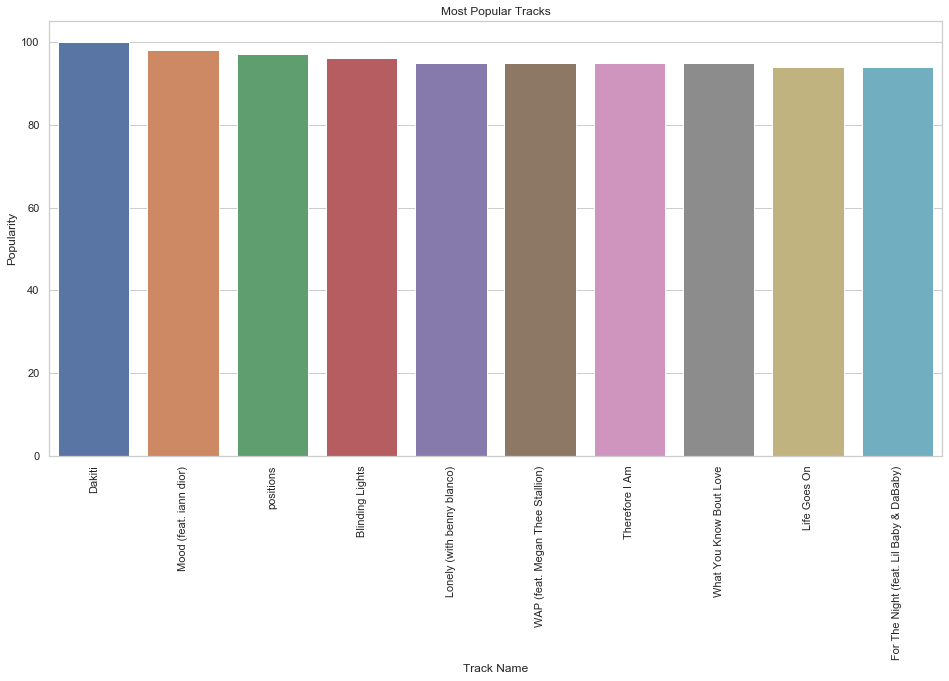

In [17]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = df.groupby("name")["popularity"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x=x.index, y=x)
ax.set_title('Most Popular Tracks')
ax.set_ylabel('Popularity')
ax.set_xlabel('Track Name')
plt.xticks(rotation = 90)
plt.show()

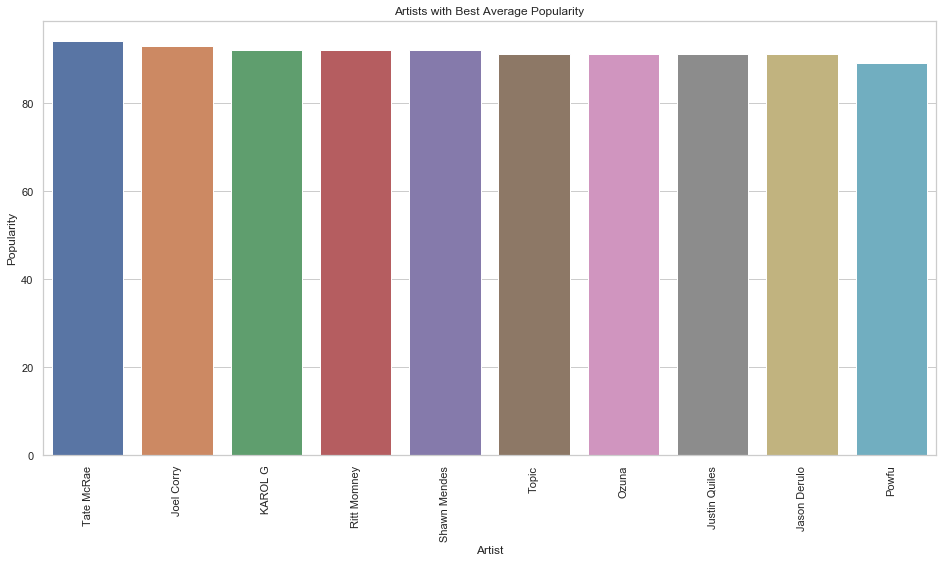

In [18]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = df.groupby("artist")["popularity"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x=x.index, y=x)
ax.set_title('Artists with Best Average Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artist')
plt.xticks(rotation = 90)
plt.show()

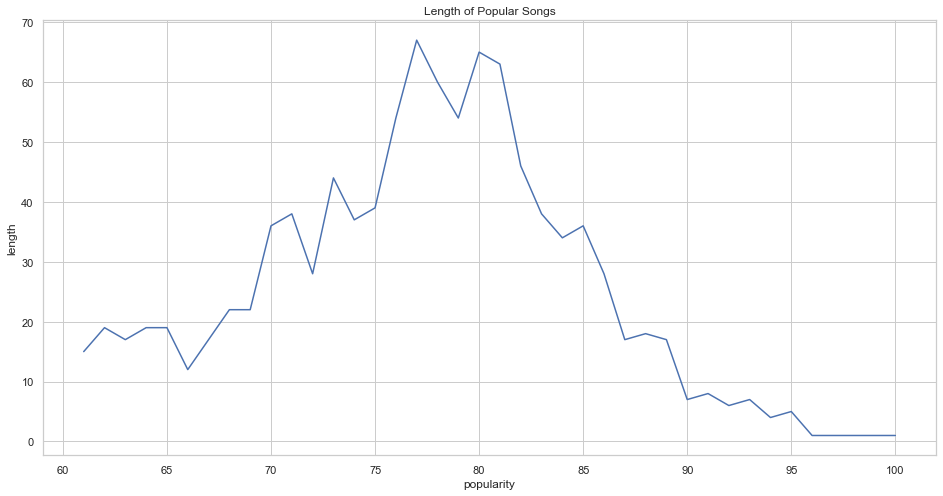

In [19]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = df.groupby("popularity")["length"].count()
ax= sns.lineplot(x=x.index,y=x)
ax.set_title('Length of Popular Songs')
ax.set_ylabel('length')
ax.set_xlabel('popularity')
plt.show()

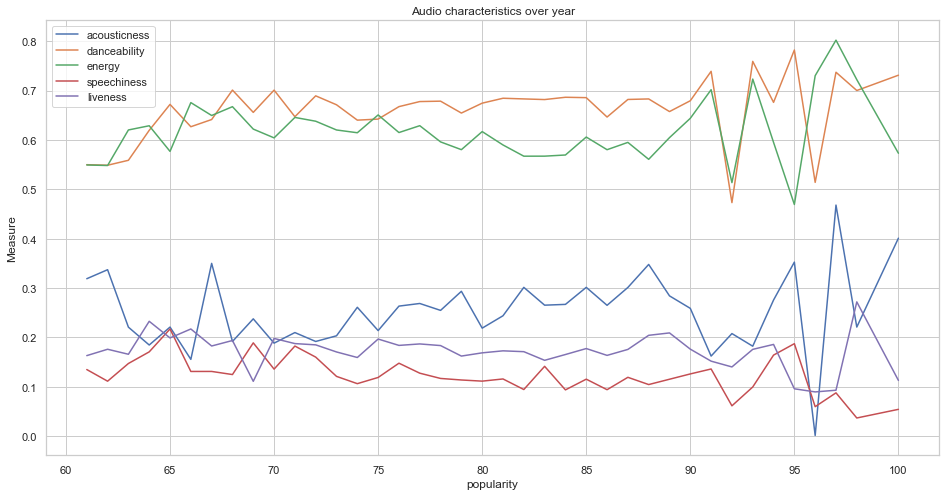

In [20]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness"]
for col in columns:
    x = df.groupby("popularity")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('popularity')
plt.show()

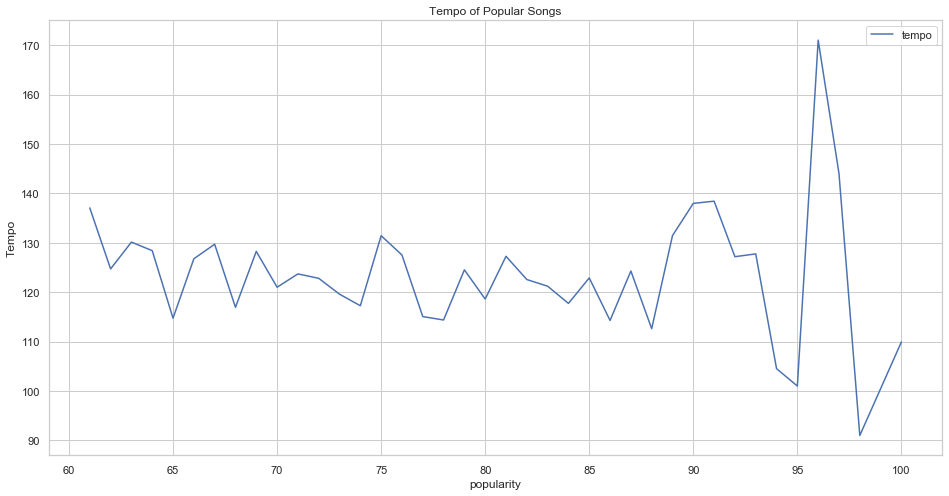

In [21]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["tempo"]
for col in columns:
    x = df.groupby("popularity")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Tempo of Popular Songs')
ax.set_ylabel('Tempo')
ax.set_xlabel('popularity')
plt.show()

<Figure size 1152x576 with 0 Axes>

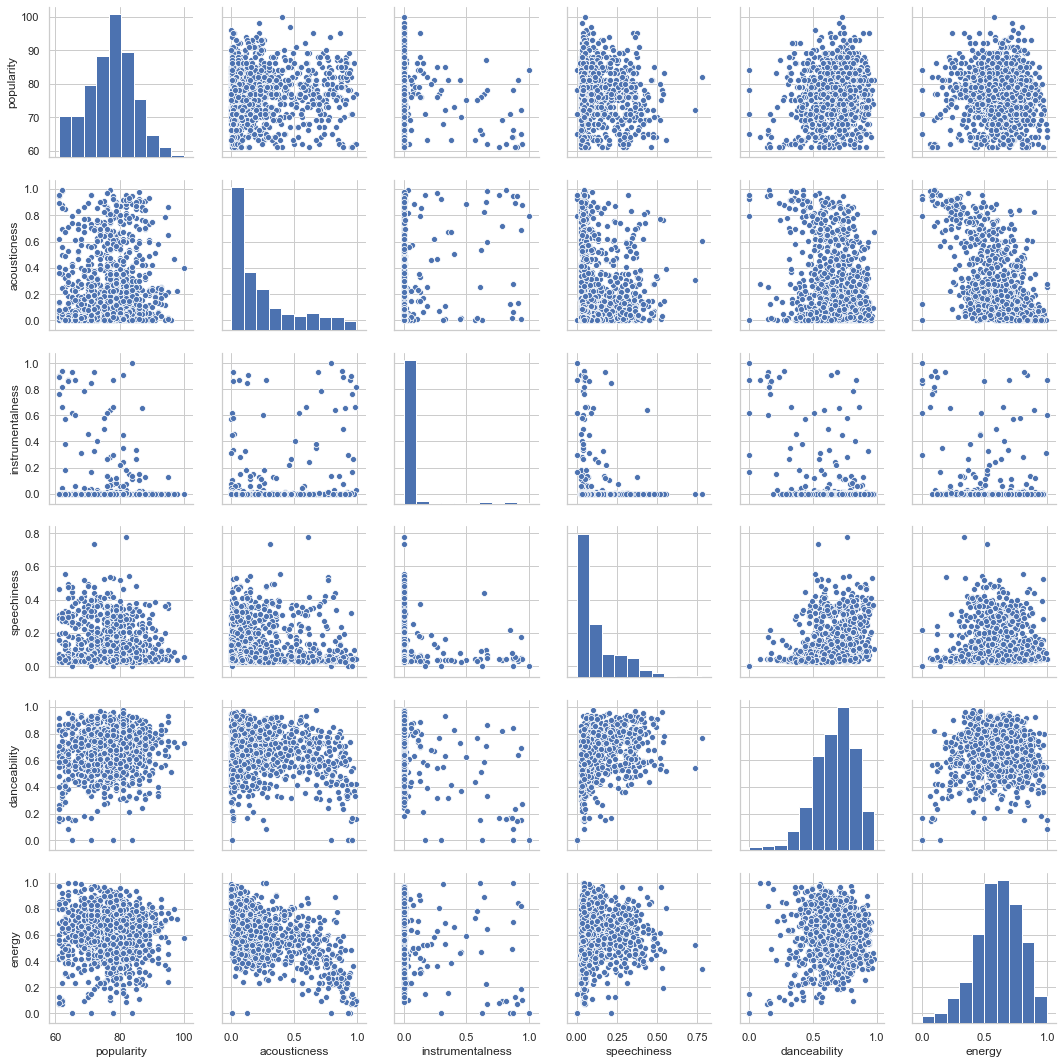

In [22]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
cols = ["popularity","acousticness","instrumentalness","speechiness","danceability","energy"]
sns.pairplot(df[cols], height = 2.5 )
plt.show()

### Plotting the correlation between features

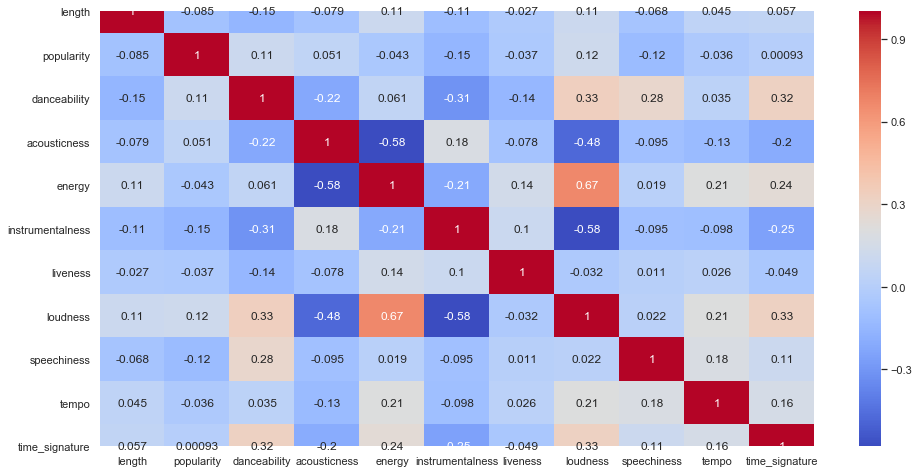

In [23]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

### Preprocessing

Dropping features we won't use in Clustering.
Popularity is not necessary because we are inspecting ONLY popular songs.

In [24]:
df2 = df.drop(['release_date','name','album','artist',"popularity"],axis=1)

In [25]:
df2

,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,4.018433,0.336,0.16400,0.627,0.000000,0.0708,-7.463,0.0384,150.273,4
1,2.763650,0.671,0.07690,0.529,0.000335,0.0856,-7.226,0.3070,161.989,4
2,2.798583,0.629,0.00981,0.692,0.331000,0.6030,-8.045,0.0376,162.948,4
3,2.966667,0.682,0.15600,0.683,0.000023,0.2730,-6.444,0.0287,120.023,4
4,2.528400,0.762,0.04420,0.426,0.000000,0.0858,-6.865,0.1130,167.827,4
...,...,...,...,...,...,...,...,...,...,...
1739,2.816433,0.744,0.08580,0.556,0.000000,0.1000,-6.970,0.0375,105.006,4
1743,5.754000,0.814,0.29700,0.714,0.000005,0.0910,-4.650,0.2070,176.013,4
1744,3.000883,0.831,0.08030,0.452,0.000000,0.3590,-5.111,0.0470,93.040,4
1745,3.628433,0.728,0.62100,0.563,0.000000,0.1790,-8.053,0.1340,100.017,4


### Scaling the features

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

u = mean, s = standart deviation

In [26]:
scaler = StandardScaler()
df2 = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

In [27]:
df2

,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0.835097,-2.027824,-0.327220,0.109274,-0.207455,-0.765888,-0.061064,-0.734255,0.887642,0.163567
1,-0.733366,0.038602,-0.652922,-0.420706,-0.204827,-0.658936,0.001880,1.495447,1.258450,0.163567
2,-0.689700,-0.220472,-0.903798,0.460791,2.389521,3.080039,-0.215634,-0.740896,1.288802,0.163567
3,-0.479598,0.106455,-0.357135,0.412119,-0.207273,0.695304,0.209566,-0.814776,-0.069763,0.163567
4,-1.027425,0.599930,-0.775200,-0.977725,-0.207455,-0.657491,0.097756,-0.114985,1.443221,0.163567
...,...,...,...,...,...,...,...,...,...,...
1017,-0.667387,0.488898,-0.619641,-0.274691,-0.207455,-0.554875,0.069869,-0.741726,-0.545047,0.163567
1018,3.004532,0.920688,0.170121,0.579766,-0.207417,-0.619913,0.686025,0.665327,1.702306,0.163567
1019,-0.436827,1.025552,-0.640208,-0.837118,-0.207455,1.316781,0.563590,-0.662864,-0.923768,0.163567
1020,0.347602,0.390203,1.381687,-0.236835,-0.207455,0.016016,-0.217759,0.059340,-0.702948,0.163567


### Clustering

We used K-Means Clustering Algorithm to group our data. It takes an integer K, and divides the data into K clusters.
To find the best K, we tried several numbers and stored their error (WCSS).

WCSS (Within Cluster Sum Of Squares) is the sum of squares of the distances of each data point in all clusters to their respective centroids.

In [28]:
wcss=[]
for i in range(1,11):
    model = KMeans(n_clusters=i, init='k-means++',n_init=10, max_iter=1000, random_state=0)
    model.fit(df2)
    wcss.append(model.inertia_)
    #Within-Cluster-Sum-of-Squares (WCSS)

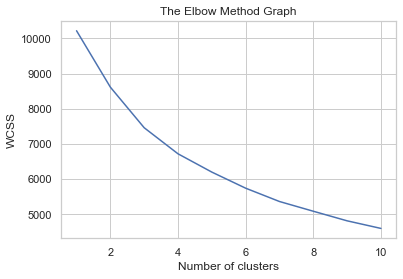

In [29]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We decided to choose 4 as our K.
Trained our model for the last time and predicted the clusters.

In [30]:
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=500, n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(df2)

Added cluster information to the dataframe.

In [31]:
df['cluster'] = y_kmeans

In [32]:
df

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
0,All I Want for Christmas Is You,Merry Christmas,Mariah Carey,1994-11-01,4.018433,92,0.336,0.16400,0.627,0.000000,0.0708,-7.463,0.0384,150.273,4,1
1,All Girls Are The Same,Goodbye & Good Riddance,Juice WRLD,2018-12-10,2.763650,87,0.671,0.07690,0.529,0.000335,0.0856,-7.226,0.3070,161.989,4,3
2,After Party,Heaven Or Hell,Don Toliver,2020-03-13,2.798583,85,0.629,0.00981,0.692,0.331000,0.6030,-8.045,0.0376,162.948,4,1
3,Are You Bored Yet? (feat. Clairo),Nothing Happens,Wallows,2019-03-22,2.966667,85,0.682,0.15600,0.683,0.000023,0.2730,-6.444,0.0287,120.023,4,1
4,ALWAYS DO,F*CK LOVE (SAVAGE),The Kid LAROI,2020-11-06,2.528400,84,0.762,0.04420,0.426,0.000000,0.0858,-6.865,0.1130,167.827,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,Stacy,A Letter To My Younger Self,Quinn XCII,2020-07-10,2.816433,72,0.744,0.08580,0.556,0.000000,0.1000,-6.970,0.0375,105.006,4,1
1743,La Jeepeta - Remix,Now Or Never,Nio Garcia,2020-07-24,5.754000,81,0.814,0.29700,0.714,0.000005,0.0910,-4.650,0.2070,176.013,4,1
1744,Coffee (feat. Marc E. Bassy),A Letter To My Younger Self,Quinn XCII,2020-07-10,3.000883,70,0.831,0.08030,0.452,0.000000,0.3590,-5.111,0.0470,93.040,4,1
1745,We Don't Talk Anymore (feat. Selena Gomez),Nine Track Mind,Charlie Puth,2016-01-29,3.628433,68,0.728,0.62100,0.563,0.000000,0.1790,-8.053,0.1340,100.017,4,0


In [33]:
clus_0 =df[df["cluster"] == 0]
clus_1 =df[df["cluster"] == 1] 
clus_2 =df[df["cluster"] == 2] 
clus_3 =df[df["cluster"] == 3] 

It seems like some clusters are more popular than other in our data.

In [34]:
df.cluster.value_counts()

1    549
0    239
3    215
2     19
Name: cluster, dtype: int64

In [35]:
df_result = pd.DataFrame(clus_0.mean(), columns=['Pop'])
df_result.insert(1, "Rap", clus_1.mean())
df_result.insert(2, "Alternative", clus_2.mean())
df_result.insert(3, "New Age", clus_3.mean())

Mean of audio features of all clusters.
We observed clusters have some identical features.

Cluster 4 has very high instrumentalness comparing to others. Its tempo, danceability, energy, loudness are lower.
It also has high acousticness, We decided to name this cluster New Age.

Cluster 2 has very high speechiness comparing to others. Its tempo is the highest too. We can clearly name this cluster Rap.

Cluster 1 and Cluster 3 have some similar features, we can say this two look like Pop. But their acousticness are very different as well as their energy. Cluster 3 has significantly less energy and high acousticness than Cluster 1. We named Cluster 3 as Slow.

Cluster 1 is mostly consists of high energy pop songs, Its tempo is high too. We named this cluster Pop.

In [36]:
df_result

,Pop,Rap,Alternative,New Age
length,3.443827,3.448891,2.401345,3.078675
popularity,78.046025,77.333333,68.263158,76.297674
danceability,0.611431,0.665918,0.201753,0.761916
acousticness,0.576008,0.125759,0.632716,0.178186
energy,0.425233,0.700929,0.234502,0.601149
instrumentalness,0.026305,0.009667,0.743263,0.006078
liveness,0.155427,0.185212,0.293879,0.168654
loudness,-9.511155,-5.676803,-25.542684,-7.056572
speechiness,0.077053,0.076895,0.050816,0.316493
tempo,113.872172,121.918969,82.615737,135.802572


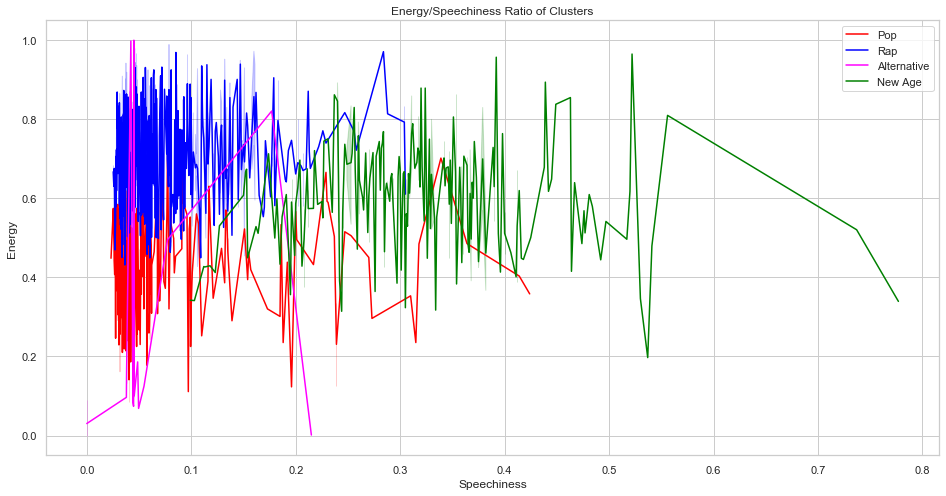

In [37]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = [clus_0, clus_1, clus_2, clus_3]
labels = ["Pop", "Rap", "Alternative", "New Age"]
colors = ['red','blue','magenta','green']
for i in range(len(columns)):
    ax= sns.lineplot(x=columns[i]['speechiness'],y=columns[i]['energy'], label=labels[i], color=colors[i])
ax.set_title('Energy/Speechiness Ratio of Clusters')
ax.set_ylabel('Energy')
ax.set_xlabel('Speechiness')
plt.show()

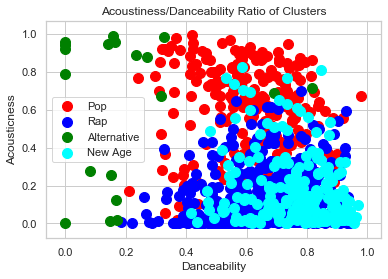

In [38]:
plt.scatter(clus_0['danceability'], clus_0['acousticness'], s=100, c='red', label ='Pop')
plt.scatter(clus_1['danceability'], clus_1['acousticness'], s=100, c='blue', label ='Rap')
plt.scatter(clus_2['danceability'], clus_2['acousticness'], s=100, c='green', label ='Alternative')
plt.scatter(clus_3['danceability'], clus_3['acousticness'], s=100, c='cyan', label ='New Age')
plt.title('Acoustiness/Danceability Ratio of Clusters')
plt.xlabel('Danceability')
plt.ylabel('Acousticness')
plt.legend()
plt.show()

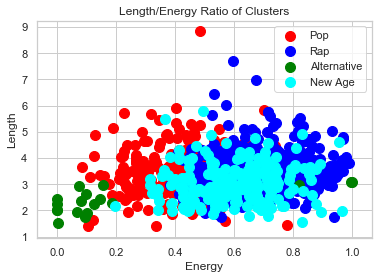

In [39]:
plt.scatter(clus_0['energy'], clus_0['length'], s=100, c='red', label ='Pop')
plt.scatter(clus_1['energy'], clus_1['length'], s=100, c='blue', label ='Rap')
plt.scatter(clus_2['energy'], clus_2['length'], s=100, c='green', label ='Alternative')
plt.scatter(clus_3['energy'], clus_3['length'], s=100, c='cyan', label ='New Age')
plt.title('Length/Energy Ratio of Clusters')
plt.xlabel('Energy')
plt.ylabel('Length')
plt.legend()
plt.show()

Pop Cluster:

In [40]:
clus_0 

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
7,ANTES QUE SE ACABE,EL ÚLTIMO TOUR DEL MUNDO,Bad Bunny,2020-11-27,3.686433,82,0.693,0.505,0.549,0.000047,0.3240,-6.098,0.0577,139.988,4,0
8,A Holly Jolly Christmas - Single Version,Have A Holly Jolly Christmas,Burl Ives,1965-01-01,2.258883,76,0.683,0.579,0.375,0.000000,0.0760,-13.056,0.0303,140.467,4,0
10,All of Me,Love In The Future (Expanded Edition),John Legend,2013-08-30,4.492667,86,0.422,0.922,0.264,0.000000,0.1320,-7.064,0.0322,119.930,4,0
12,At My Worst,The Prelude,Pink Sweat$,2020-07-17,2.839067,85,0.813,0.777,0.415,0.000000,0.1310,-5.926,0.0349,91.921,4,0
14,All I Want,In A Perfect World (Expanded Edition),Kodaline,2013-06-17,5.095767,83,0.209,0.172,0.412,0.150000,0.0843,-9.733,0.0443,86.260,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,History,Head In The Clouds,88rising,2018-07-20,3.455117,66,0.554,0.613,0.589,0.000257,0.0982,-8.163,0.2310,74.982,4,0
1699,Moreno 80,Moreno 80 (feat. Herencia de Patrones),Los Hijos De Garcia,2019-03-22,3.033333,61,0.588,0.364,0.540,0.000006,0.2190,-5.057,0.0713,176.445,3,0
1707,9,3,WILLOW,2014-11-11,4.230000,63,0.597,0.215,0.495,0.000163,0.1040,-8.674,0.2010,76.991,4,0
1708,911,Can You Keep a Secret?,Ellise,2018-10-12,3.166667,68,0.698,0.571,0.611,0.000005,0.0587,-6.754,0.0686,130.098,4,0


Rap Cluster: As predicted, rap songs lead this cluster.

In [41]:
clus_1

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
0,All I Want for Christmas Is You,Merry Christmas,Mariah Carey,1994-11-01,4.018433,92,0.336,0.16400,0.627,0.000000,0.0708,-7.463,0.0384,150.273,4,1
2,After Party,Heaven Or Hell,Don Toliver,2020-03-13,2.798583,85,0.629,0.00981,0.692,0.331000,0.6030,-8.045,0.0376,162.948,4,1
3,Are You Bored Yet? (feat. Clairo),Nothing Happens,Wallows,2019-03-22,2.966667,85,0.682,0.15600,0.683,0.000023,0.2730,-6.444,0.0287,120.023,4,1
5,Adore You,Fine Line,Harry Styles,2019-12-13,3.452217,87,0.676,0.02370,0.771,0.000007,0.1020,-3.675,0.0483,99.048,4,1
9,"...And To Those I Love, Thanks For Sticking Ar...",STOP STARING AT THE SHADOWS,$uicideBoy$,2020-02-14,2.808150,81,0.792,0.13000,0.512,0.000088,0.1400,-6.875,0.0408,113.978,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,Te Boté - Remix,Te Boté (Remix),Nio Garcia,2018-04-13,6.965333,77,0.903,0.54200,0.675,0.000013,0.0595,-3.445,0.2140,96.507,4,1
1739,Stacy,A Letter To My Younger Self,Quinn XCII,2020-07-10,2.816433,72,0.744,0.08580,0.556,0.000000,0.1000,-6.970,0.0375,105.006,4,1
1743,La Jeepeta - Remix,Now Or Never,Nio Garcia,2020-07-24,5.754000,81,0.814,0.29700,0.714,0.000005,0.0910,-4.650,0.2070,176.013,4,1
1744,Coffee (feat. Marc E. Bassy),A Letter To My Younger Self,Quinn XCII,2020-07-10,3.000883,70,0.831,0.08030,0.452,0.000000,0.3590,-5.111,0.0470,93.040,4,1


Slow Cluster: 

In [42]:
clus_2

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
117,Clean White Noise - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,Erik Eriksson,2017-01-08,1.503800,84,0.0000,0.7910,0.00342,1.000,0.1110,-28.460,0.0000,0.000,0,2
1060,Zen Thunder,Zen Thunder,Zen Master,2020-08-09,2.983333,65,0.1490,0.0122,0.82000,0.933,0.8720,-25.268,0.1770,83.354,4,2
1066,Zen Forest Sleep Noise,Analogue Noise for Sleep,Chill Machine,2020-02-07,2.033333,65,0.0000,0.0050,0.00002,0.620,0.7300,-22.399,0.0000,0.000,0,2
1106,Quiet Rain in River,Rain White Noise,Stereo Outdoor Sampling,2019-10-10,2.001383,71,0.1660,0.1250,0.00133,0.846,0.2330,-23.291,0.2150,119.669,4,2
1192,White Christmas,Holiday Inn (Original Motion Picture Soundtrack),Bing Crosby,1942-01-01,2.958000,81,0.3170,0.6730,0.15800,0.353,0.3380,-16.485,0.0381,130.503,3,2
1225,White Noise - 145 hz,Unison,Granular,2017-10-13,2.258050,78,0.0000,0.9440,0.00002,0.869,0.1120,-40.449,0.0000,0.000,0,2
1252,08pm rain,rain in gothenburg,pluvia,2020-10-16,3.100000,66,0.1500,0.2540,0.99700,0.606,0.9450,-25.282,0.0422,63.671,4,2
1294,Imagination,Imagination,Shiloh Dynasty,2018-06-02,1.746283,69,0.8160,0.7150,0.09650,0.785,0.1080,-22.035,0.0379,110.008,5,2
1441,5:32pm,Vibes 2,The Deli,2016-10-17,2.281900,72,0.6910,0.6860,0.18600,0.934,0.0762,-13.672,0.0487,86.383,4,2
1463,4am rain,rain in gothenburg,pluvia,2020-10-16,3.100000,64,0.0813,0.2770,0.99900,0.869,0.9340,-24.380,0.0451,83.812,4,2


New Age Cluster: As predicted, consists of rain noises, noises for sleeping etc.

In [43]:
clus_3

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
1,All Girls Are The Same,Goodbye & Good Riddance,Juice WRLD,2018-12-10,2.763650,87,0.671,0.0769,0.529,0.000335,0.0856,-7.226,0.307,161.989,4,3
4,ALWAYS DO,F*CK LOVE (SAVAGE),The Kid LAROI,2020-11-06,2.528400,84,0.762,0.0442,0.426,0.000000,0.0858,-6.865,0.113,167.827,4,3
6,Armed And Dangerous,Goodbye & Good Riddance,Juice WRLD,2018-12-10,2.833317,81,0.736,0.1860,0.670,0.000000,0.1140,-6.702,0.311,130.032,4,3
11,"Ay, DiOs Mío!","Ay, DiOs Mío!",KAROL G,2020-07-10,3.160883,91,0.718,0.5120,0.712,0.001210,0.1040,-4.366,0.174,180.034,4,3
15,Adderall (Corvette Corvette),Adderall (Corvette Corvette),Popp Hunna,2020-10-15,2.270400,80,0.913,0.2720,0.391,0.000000,0.0666,-11.158,0.368,141.050,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,infinity (888) - feat. Joey Bada$$,?,XXXTENTACION,2018-03-16,2.943167,70,0.562,0.2740,0.579,0.000000,0.1020,-6.788,0.484,84.143,4,3
1688,A.D.H.D,Section.80,Kendrick Lamar,2011-07-02,3.591817,71,0.609,0.3300,0.799,0.000000,0.1080,-6.883,0.240,157.740,4,3
1693,Motiv8,KOD,J. Cole,2018-04-20,2.232017,64,0.869,0.1350,0.385,0.000000,0.0931,-7.801,0.297,149.897,4,3
1710,93 'Til Infinity,93 'til Infinity,Souls Of Mischief,1993-02-13,4.774000,68,0.590,0.1250,0.672,0.000001,0.1470,-11.792,0.412,206.247,4,3
